# EDA for Dataframes
dropped station 62 and 74 during data loading from .zarr files due to y labels that are all nan

In [1]:
%cd /home/ltchen/gnnpp
%ls utils

/home/ltchen/gnnpp
data.py*  drn_utils.py*  __init__.py*  plot.py*  __pycache__/


In [2]:
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))
import matplotlib.pyplot as plt
from utils.data import load_dataframes, summary_statistics
from utils.drn_utils import normalize_features

import seaborn as sns
import pandas as pd
import numpy as np

### Dataframes for 'train': train_rf (1997-2013), test_rf (2014-2017), test_f (2017-2018)

In [3]:
dataframes_trn = load_dataframes(leadtime="24h")
(t_train_rf, t_train_rf_target) = dataframes_trn["train"]
(t_test_rf, t_test_rf_target) = dataframes_trn["test_rf"]
(t_test_f, t_test_f_target) = dataframes_trn["test_f"]
t_stations_f = dataframes_trn["stations"]

[INFO] Dataframes exist. Will load pandas dataframes.


In [4]:
t_test_rf_target.isna().sum() / t_test_rf_target.shape[0]

time          0.00000
station_id    0.00000
t2m           0.12451
dtype: float64

In [ ]:
# after dropping nans
t_test_rf_target['station_id'].unique()
# why do I only have 109 unique station ids? => 119? # 81, 82, 85, 86, 87, 95, 96, 98, 100, 103, 109

In [5]:
sum_dfs_train = summary_statistics(dataframes_trn)
print(type(sum_dfs_train))
print(sum_dfs_train[0])
# check shape of each item in dfs?

[INFO] Calculating summary statistics for train
[INFO] Calculating summary statistics for valid
[INFO] Calculating summary statistics for test_rf
[INFO] Calculating summary statistics for test_f
<class 'collections.defaultdict'>
None


In [6]:
print(f"Shape of train_rf: {t_train_rf.shape}")
print(f"Shape of test_rf: {t_test_rf.shape}")
print(f"Shape of test_f: {t_test_f.shape}")
print("")
print(f"# Ensemble members in train_rf: {t_train_rf.number.nunique()}")
print(f"# Ensemble members in test_rf: {t_test_rf.number.nunique()}")
print(f"# Ensemble members in test_f: {t_test_f.number.nunique()}")
print("")
print(f"Unique times in train_rf: {t_train_rf.time.nunique()}")
print(f"Unique times in test_rf: {t_test_rf.time.nunique()}")
print(f"Unique times in test_f: {t_test_f.time.nunique()}")

Shape of train_rf: (3447840, 36)
Shape of test_rf: (966240, 36)
Shape of test_f: (4467600, 36)

# Ensemble members in train_rf: 11
# Ensemble members in test_rf: 11
# Ensemble members in test_f: 51

Unique times in train_rf: 2612
Unique times in test_rf: 732
Unique times in test_f: 730


In [ ]:
# train, valid_test = normalize_features(
#     training_data=dataframes_trn["train"], valid_test_data=[dataframes_trn["test_rf"], dataframes_trn["test_f"]]
# )
# for drn (?)

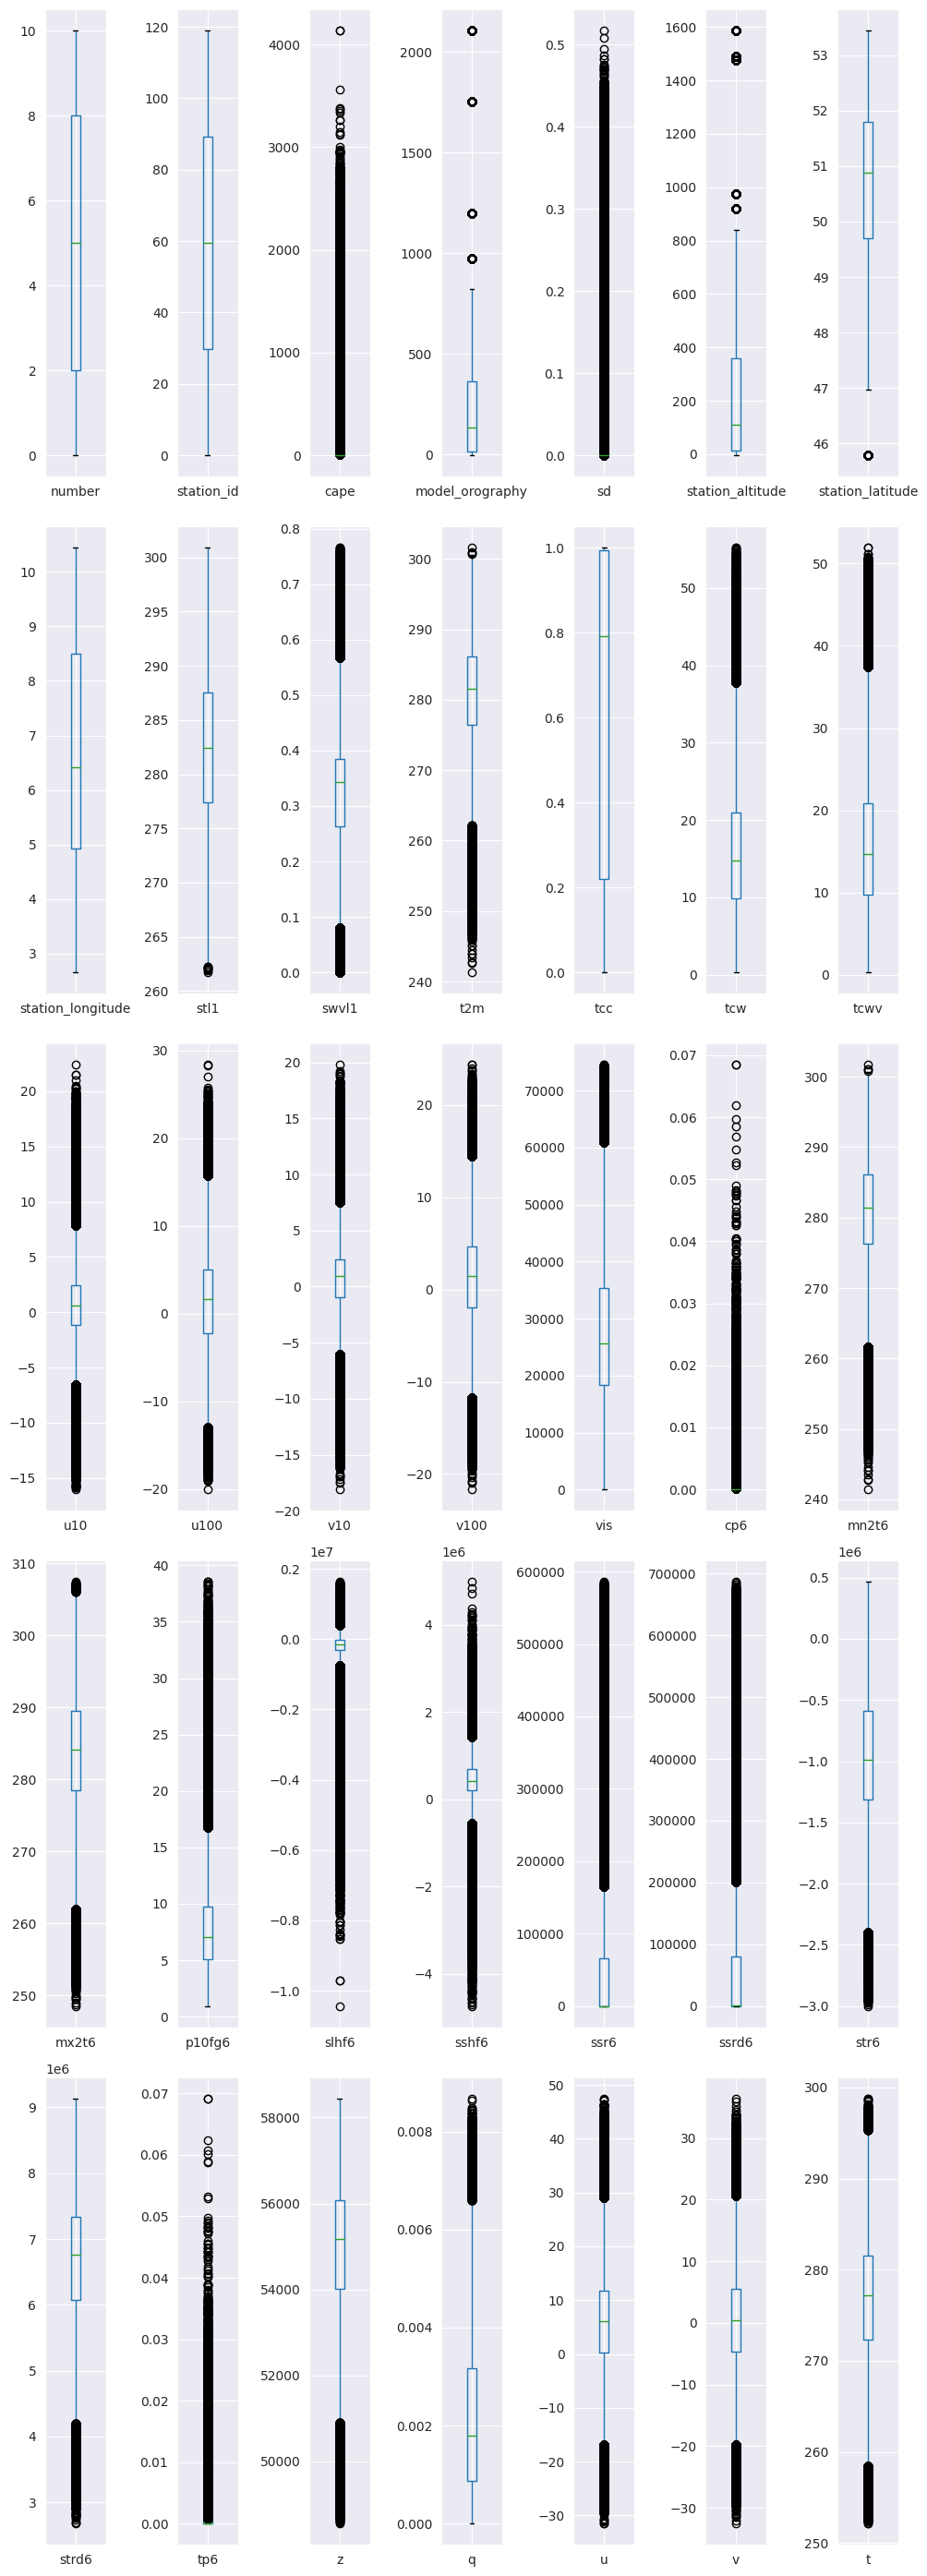

In [9]:
# plot
fig, axes = plt.subplots(5, 7, figsize=(10, 28))
axes = axes.flatten()
for i, col in enumerate(t_train_rf.select_dtypes(include=['number']).columns):
    # t_train_rf.boxplot(col, ax=axes[i])
    t_train_rf[[col]].boxplot(ax=axes[i])
plt.tight_layout()
plt.show()

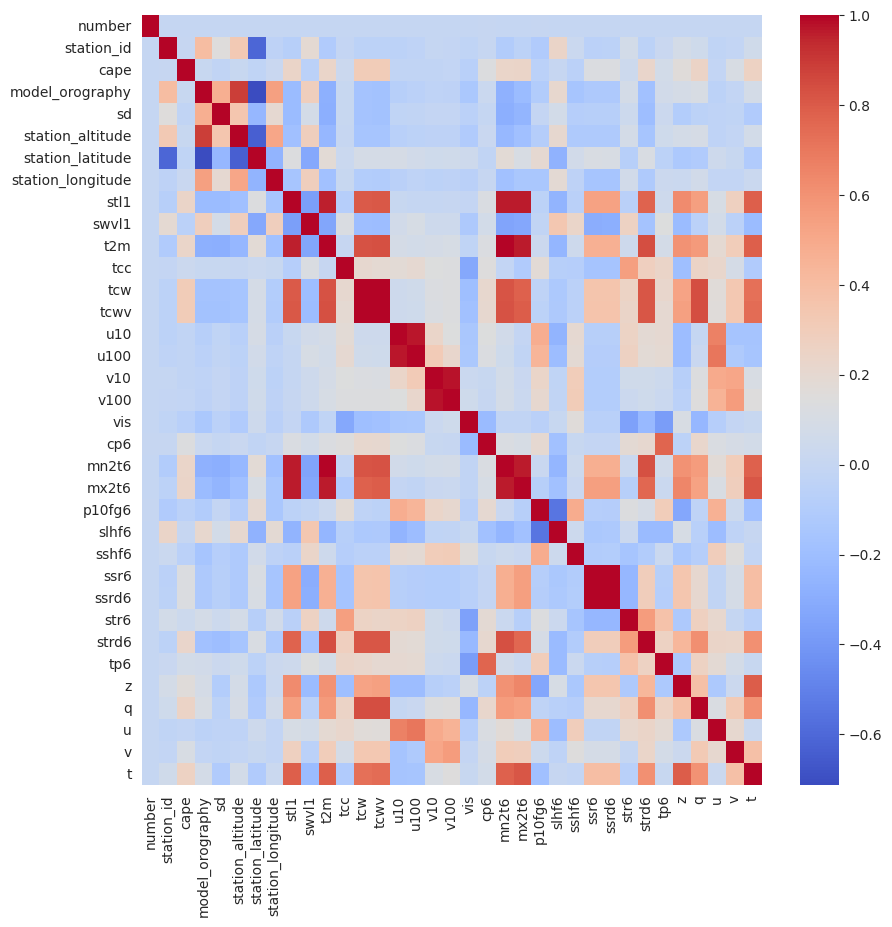

In [10]:
### Correlations # is this right??
corr_mat = t_train_rf.corr(numeric_only=True)

plt.figure(figsize=(10, 10))
sns.heatmap(corr_mat, annot=False, cmap="coolwarm")

plt.show()


Index(['station_id', 'lat', 'lon', 'altitude', 'orog', 'name'], dtype='object')


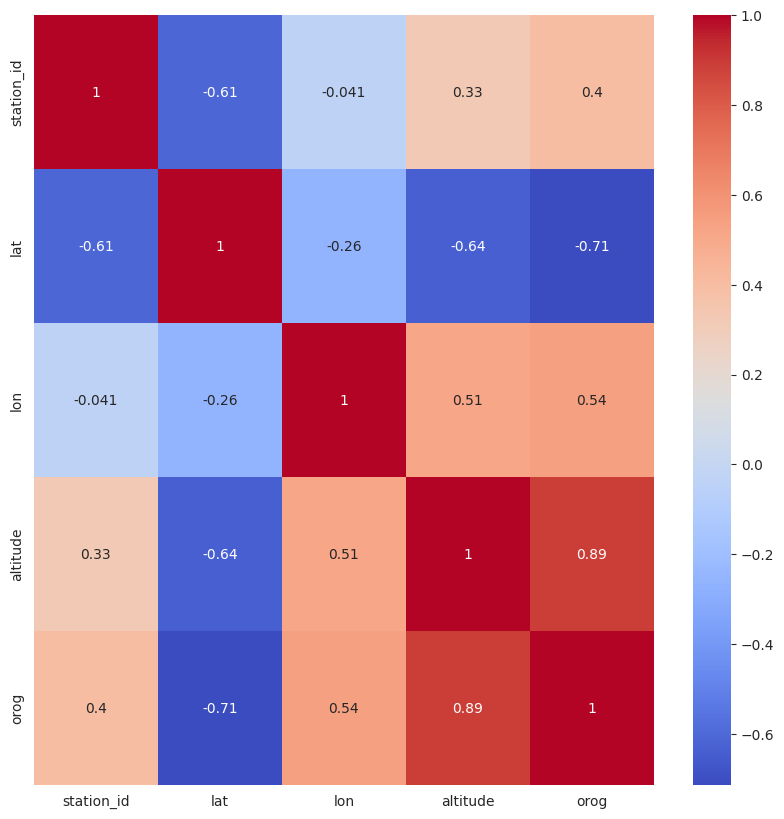

In [11]:
print(t_stations_f.columns)
stat_corr = t_stations_f.corr(numeric_only=True)

plt.figure(figsize=(10, 10))
sns.heatmap(stat_corr, annot=True, cmap="coolwarm")

plt.show()

1       278.737213
121     279.326904
241     279.822876
361     278.299561
481     278.829437
601     279.344177
721     278.581055
841     277.779602
961     280.218353
1081    278.959167
1201    277.982788
Name: t2m, dtype: float32
(11,)
        time  station_id     t2m
1 1997-01-02           1  279.55
(1, 3)


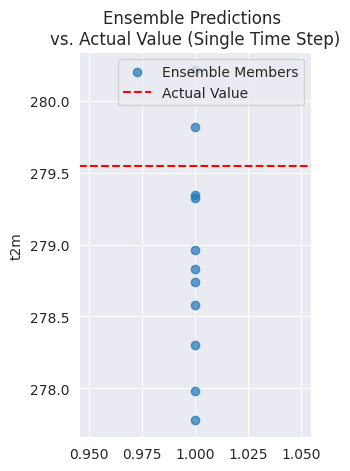

In [12]:
# plot one Station, all ensembles, one point in time
print(t_train_rf[(t_train_rf["station_id"]==1) & (t_train_rf["time"]=="1997-01-02")]["t2m"])
ensembles = t_train_rf[(t_train_rf["station_id"]==1) & (t_train_rf["time"]=="1997-01-02")]["t2m"]
print(ensembles.shape)
# predicted t2m mu via neural network (crps) for this time and this station

# actual t2m for this station
print(t_train_rf_target[(t_train_rf_target["station_id"]==1) & (t_train_rf_target["time"]=="1997-01-02")])
actual = t_train_rf_target[(t_train_rf_target["station_id"]==1) & (t_train_rf_target["time"]=="1997-01-02")]
print(actual.shape)

plt.figure(figsize=(3, 5))

plt.scatter(np.ones(len(ensembles)), ensembles, label="Ensemble Members", alpha=0.7)
plt.axhline(actual.iloc[0, 2], color="red", linestyle="--", label="Actual Value")
#plt.xticks(range(len(ensembles)), [f"Member {i+1}" for i in range(len(ensembles))])
plt.ylabel("t2m")
plt.title(f"Ensemble Predictions \nvs. Actual Value (Single Time Step)")
plt.legend()
plt.show()



In [8]:
print(sum_dfs_train['train'][0]['t2m_mean'])
print(sum_dfs_train['train'][1]['t2m'])

0         279.183807
1         278.898285
2         278.370850
3         277.342896
4         278.731567
             ...    
313435    283.422699
313436    274.349762
313437    271.944794
313438    267.208282
313439    262.805878
Name: t2m_mean, Length: 313440, dtype: float32
0         277.75
1         279.55
2         276.45
3         275.75
4         279.35
           ...  
313435    286.25
313436    282.65
313437    278.75
313438    280.35
313439    277.55
Name: t2m, Length: 313440, dtype: float64


(313440, 65)
(313440, 3)


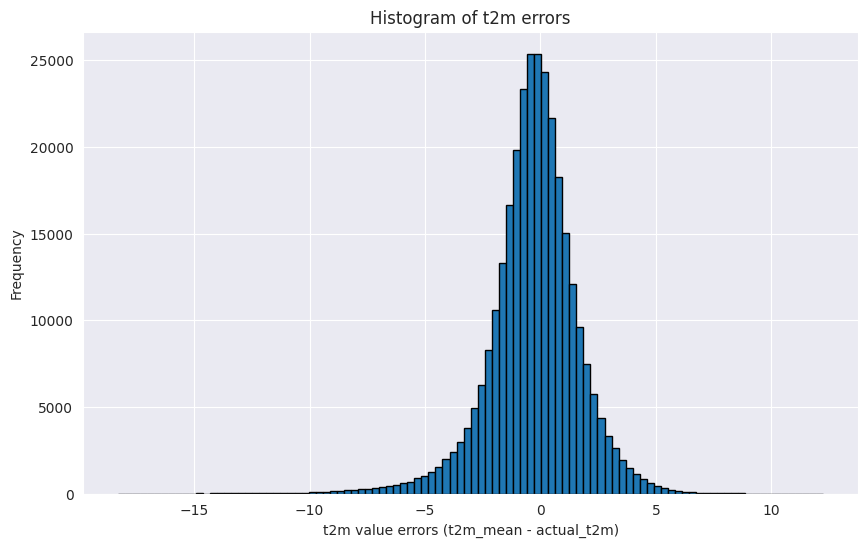

In [12]:
print(sum_dfs_train['train'][0].shape)
print(sum_dfs_train['train'][1].shape)
all_t2m_errors = np.array(sum_dfs_train['train'][0]['t2m_mean'] - sum_dfs_train['train'][1]['t2m'])

plt.figure(figsize=(10, 6))
plt.hist(all_t2m_errors.flatten(), bins=100, edgecolor='black')
plt.title('Histogram of t2m errors')
plt.xlabel('t2m value errors (t2m_mean - actual_t2m)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

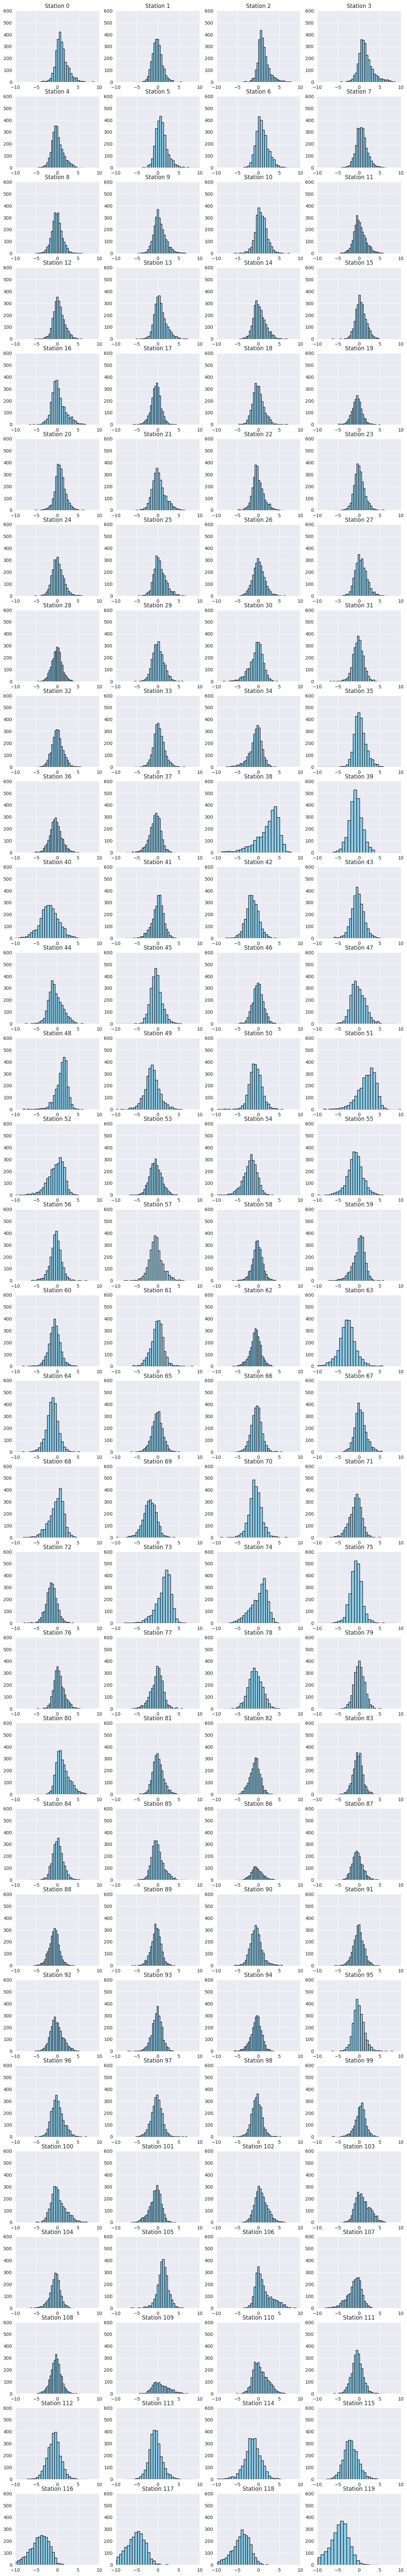

In [18]:
fig, axes = plt.subplots(30, 4, figsize=(15, 100))
axes = axes.flatten()
e_stations = np.arange(0, 120, 1)

for i, id in enumerate(e_stations):
    t2m_errors_station = np.array(sum_dfs_train['train'][0][sum_dfs_train['train'][0]['station_id']== id]['t2m_mean'] - sum_dfs_train['train'][1][sum_dfs_train['train'][1]['station_id'] == id]['t2m'])
    axes[i].hist(t2m_errors_station.flatten(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f"Station {id}")
    # axes[i].set_xlabel("Value")
    # axes[i].set_ylabel("Frequency")

for ax in axes:
    ax.set_xlim(-10, 10)
    ax.set_ylim(0, 600)
# plt.tight_layout()
plt.show()